In [1]:
# Part 1 Data Preprocessing

# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing Dataset
dataset_train = pd.read_csv('google_train.csv')
train_dataset = dataset_train.iloc[:, 1:2].values

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_dataset_scaled = sc.fit_transform(train_dataset)

In [6]:
X_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
    X_train.append(train_dataset_scaled[i-60: i, 0])
    y_train.append(train_dataset_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part -2 Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile('adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, batch_size=32, epochs=50)

Using TensorFlow backend.


Epoch 1/50
3213/3213 [==============================] - 16s 5ms/step - loss: 0.0136
Epoch 2/50
3213/3213 [==============================] - 13s 4ms/step - loss: 0.0020
Epoch 3/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0019
Epoch 4/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0016
Epoch 5/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0022
Epoch 6/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0016
Epoch 7/50
3213/3213 [==============================] - 13s 4ms/step - loss: 0.0016
Epoch 8/50
3213/3213 [==============================] - 13s 4ms/step - loss: 0.0014
Epoch 9/50
3213/3213 [==============================] - 13s 4ms/step - loss: 0.0014
Epoch 10/50
3213/3213 [==============================] - 15s 5ms/step - loss: 0.0014
Epoch 11/50
3213/3213 [==============================] - 13s 4ms/step - loss: 0.0013
Epoch 12/50
3213/3213 [==============================] - 14s 4ms/step - lo

In [8]:
dataset_test = pd.read_csv('google_test.csv')
real_values = dataset_test.iloc[:, 1:2].values

In [9]:
# Part -3 Predicting results


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [10]:
dataset_total = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [11]:
dataset_total = dataset_total.reshape(-1, 1)


In [12]:
X_test = []

for i in range(60, dataset_total.shape[0]):
    X_test.append(dataset_total[i-60: i, 0])

X_test = np.array(X_test)

X_test = sc.transform(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)

pred = sc.inverse_transform(pred)

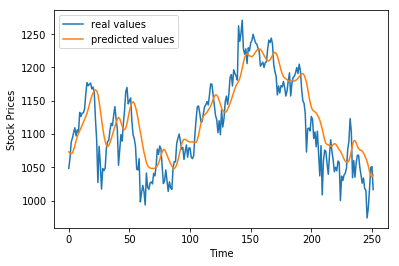

In [13]:
# Visualising Results
plt.plot(real_values, label = 'real values')
plt.plot(pred, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [14]:
google_yaml = regressor.to_yaml()
with open("google.yaml", "w") as yaml_file:
    yaml_file.write(google_yaml)
# serialize weights to HDF5
regressor.save_weights("google.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
from sklearn.externals import joblib
scaler_filename = "google_scaler.save"
joblib.dump(sc, scaler_filename) 


['google_scaler.save']

# Apple

In [16]:
dataset_train = pd.read_csv('AAPL_train.csv')
train_dataset = dataset_train.iloc[:, 1:2].values
train_dataset_scaled = sc.fit_transform(train_dataset)
X_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
    X_train.append(train_dataset_scaled[i-60: i, 0])
    y_train.append(train_dataset_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile('adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
3213/3213 [==============================] - 16s 5ms/step - loss: 0.0115
Epoch 2/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0025
Epoch 3/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0023
Epoch 4/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0019
Epoch 5/50
3213/3213 [==============================] - 18s 6ms/step - loss: 0.0018
Epoch 6/50
3213/3213 [==============================] - 16s 5ms/step - loss: 0.0018
Epoch 7/50
3213/3213 [==============================] - 17s 5ms/step - loss: 0.0017
Epoch 8/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0016
Epoch 9/50
3213/3213 [==============================] - 15s 5ms/step - loss: 0.0015
Epoch 10/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0015
Epoch 11/50
3213/3213 [==============================] - 14s 4ms/step - loss: 0.0013
Epoch 12/50
3213/3213 [==============================] - 13s 4ms/step - lo

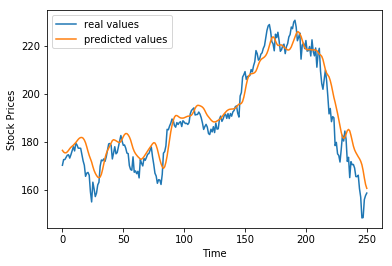

In [18]:
dataset_test = pd.read_csv('AAPL_test.csv')
real_values = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
dataset_total = dataset_total.reshape(-1, 1)
X_test = []

for i in range(60, dataset_total.shape[0]):
    X_test.append(dataset_total[i-60: i, 0])

X_test = np.array(X_test)

X_test = sc.transform(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)

pred = sc.inverse_transform(pred)

# Visualising Results
plt.plot(real_values, label = 'real values')
plt.plot(pred, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [19]:
apple_yaml = regressor.to_yaml()
with open("apple.yaml", "w") as yaml_file:
    yaml_file.write(apple_yaml)
# serialize weights to HDF5
regressor.save_weights("apple.h5")
print("Saved model to disk")
scaler_filename = "apple_scaler.save"
joblib.dump(sc, scaler_filename) 


Saved model to disk


['apple_scaler.save']

# Microsoft

In [20]:
dataset_train = pd.read_csv('MSFT_train.csv')
train_dataset = dataset_train.iloc[:, 1:2].values
train_dataset_scaled = sc.fit_transform(train_dataset)
X_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
    X_train.append(train_dataset_scaled[i-60: i, 0])
    y_train.append(train_dataset_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile('adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
3213/3213 [==============================] - 15s 5ms/step - loss: 0.0098
Epoch 2/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0018
Epoch 3/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0014
Epoch 4/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0016
Epoch 5/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0013
Epoch 6/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0014
Epoch 7/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0013
Epoch 8/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0011
Epoch 9/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0012
Epoch 10/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0010
Epoch 11/50
3213/3213 [==============================] - 12s 4ms/step - loss: 0.0011
Epoch 12/50
3213/3213 [==============================] - 12s 4ms/step - lo

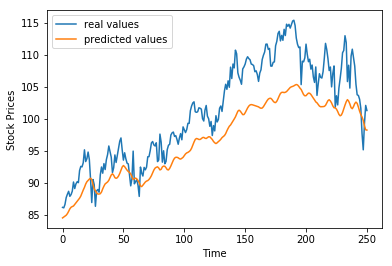

In [22]:
dataset_test = pd.read_csv('MSFT_test.csv')
real_values = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
dataset_total = dataset_total.reshape(-1, 1)
X_test = []

for i in range(60, dataset_total.shape[0]):
    X_test.append(dataset_total[i-60: i, 0])

X_test = np.array(X_test)

X_test = sc.transform(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)

pred = sc.inverse_transform(pred)

# Visualising Results
plt.plot(real_values, label = 'real values')
plt.plot(pred, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [23]:
MSFT_yaml = regressor.to_yaml()
with open("MSFT.yaml", "w") as yaml_file:
    yaml_file.write(MSFT_yaml)
# serialize weights to HDF5
regressor.save_weights("MSFT.h5")
print("Saved model to disk")
scaler_filename = "MSFT_scaler.save"
joblib.dump(sc, scaler_filename) 


Saved model to disk


['MSFT_scaler.save']